Perceptron Clasificacion Binaria
Este modelo está inspirado en el funcionamiento de las neuronas biológicas que forman las redes neuronales de nuestros cerebros, recibiendo una serie de señales de entrada y devolviendo un resultado a la salida, calculando una suma ponderada de todos los inputs y aplicando una función de activación. Para realizar el ejemplo se necesita un conjunto de datos formado por un número determinado de elementos con varias características acompañados de sus correspondiente clase. Se va a utilizar un dataset muy utilizado en el ámbito académico muy útil para aprender a desarrollar modelos de clasificación: El dataset Iris. Este dataset contiene ejemplos de flores que tendremos que clasificar en 3 grupos diferentes a partir del ancho y longitud de sus pétalos y sépalos (en total 4 características). Este dataset está disponible a través de la librería Scikit Learn.

Se buscara determinar si un flor es de un tipo o de otra.

By Jean Carlo Alvarez


# Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)
from sklearn.preprocessing import StandardScaler
import joblib

**import numpy as np** es una biblioteca fundamental para realizar calculos numericos y trabajar con arreglos/matrices.Se usa para manejar y transformar datos numéricos, especialmente en forma de arrays

 **import matplotlib.pyplot as plt** matplotlib.pyplot es una biblioteca para crear gráficos y visualizaciones

**from sklearn.datasets import load_iris** load_iris es una función que carga el conjunto de datos Iris, muy utilizado para ejemplos en clasificacion

**from sklearn.linear_model import Perceptron** Perceptron es un clasificador lineal simple inspirado en las redes neuronales se usa para crear un modelo que clasifica datos basándose en una combinación lineal de las caracteristicas

**from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report)**

Estas funciones miden el rendimiento del modelo

**confusion_matrix**: Muestra el número de predicciones correctas e incorrectas para cada clase

**ConfusionMatrixDisplay**: Visualiza la matriz de confusión como un gráfico

**accuracy_score**: Mide la precisión (proporción de predicciones correctas)

**precision_score**: Evalúa la precisión (qué tan bien el modelo predice correctamente las clases positivas)

**recall_score**: Evalúa la recuperación o sensibilidad (qué tan bien el modelo identifica todas las instancias positivas)

**f1_score**: Combina precisión y recuperación en una sola métrica

**classification_report**: Muestra un resumen de todas las métricas mencionadas por clase

**from sklearn.preprocessing import StandardScaler** StandardScaler estandariza las caracteristicas transformandolas para que tengan una media de 0 y una desviación estándar de 1 Ayuda a mejorar el rendimiento del modelo al asegurarse de que todas las caracteristicas están en la misma escala

**import joblib** es una herramienta para guardar y cargar objetos de Python de manera eficiente Permite guardar el modelo entrenado y cargarlo después sin necesidad de volver a entrenarlo

**Cargar el dataset Iris**

In [ ]:
iris = load_iris()
# Seleccionamos las columnas 2 y 3: longitud y ancho del pétalo
X = iris.data[:, (2, 3)]

# Etiquetas originales (0: Setosa, 1: Versicolor, 2: Virginica)
y_multi = iris.target

**iris = load_iris()**
Carga el famoso conjunto de datos Iris desde scikit-learn.
Tiene:

- **iris.data**: Un arreglo NumPy con las características (mediciones de las flores)

- **iris.target**: Un arreglo con las etiquetas de las clases (tipo de flor)

- **iris.feature_names**: Nombres de las características

- **iris.target_names**: Nombres de las clases de flores

**X = iris.data[:, (2, 3)]**
Selecciono dos características especificas de las flores:

- Columna 2: Longitud del pétalo (petal length)

- Columna 3: Ancho del pétalo (petal width)

**Por que se eligen estas columnas?**
Estas características son muy efectivas para distinguir entre las especies de flores. Por ejemplo:

Setosa suele tener pétalos mucho mas pequeños
Versicolor y Virginica tienen tamaños mas grandes pero con diferencias en el ancho

**y_multi = iris.target**

Asigna las etiquetas de las flores a la variable y_multi Estas etiquetas son números enteros que representan las especies:

- 0: Setosa
- 1: Versicolor
- 2: Virginica

# Visualizar el dataset

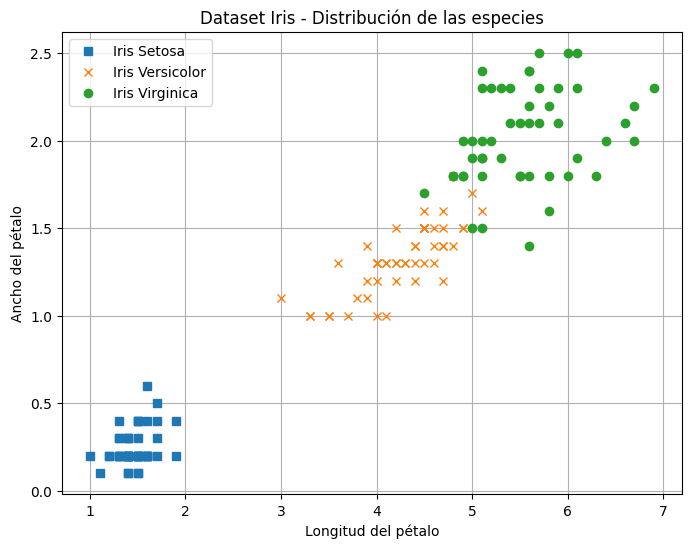

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(X[y_multi == 0, 0], X[y_multi == 0, 1], 's', label="Iris Setosa")
plt.plot(X[y_multi == 1, 0], X[y_multi == 1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y_multi == 2, 0], X[y_multi == 2, 1], 'o', label="Iris Virginica")
plt.grid(True)
plt.legend()
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title("Dataset Iris - Distribución de las especies")
plt.show()

**plt.figure(figsize=(8, 6))**
Crea una nueva figura con un tamaño especifco de 8x6. Esto hace que el grafico sea mas grande y facil de visualizar

**plt.plot(X[y_multi == 0, 0], X[y_multi == 0, 1], 's', label="Iris Setosa")**

- X[y_multi == 0, 0]: Filtra los valores de la longitud del petalo para la especie Iris Setosa (etiqueta 0)

- X[y_multi == 0, 1]: Filtra los valores del ancho del pétalo para Iris Setosa

- 's': Usa un marcador en forma de cuadrado para esta especie

- label="Iris Setosa": Etiqueta que se ve en la leyenda

**plt.plot(X[y_multi == 1, 0], X[y_multi == 1, 1], 'x', label="Iris Versicolor")**

- Filtra los datos para la especie Iris Versicolor (etiqueta 1)

- 'x': Usa un marcador en forma de cruz

- Etiqueta en la leyenda como Iris Versicolor

**plt.plot(X[y_multi == 2, 0], X[y_multi == 2, 1], 'o', label="Iris Virginica")**


- Filtra los datos para la especie Iris Virginica (etiqueta 2)

- 'o': Usa un marcador en forma de círculo

- Etiqueta en la leyenda como Iris Virginica

**Opciones de Estilo y Visualizacion**

**plt.grid(True):**
Activa la rejilla para facilitar la visualización de los puntos en el grafico

**plt.legend():**
Muestra la leyenda que identifica cada especie segun su marcador


**plt.xlabel('Longitud del pétalo') y plt.ylabel('Ancho del pétalo'):**

Etiquetas de los ejes X y Y para que se entienda qué representa cada uno.

**plt.title("Dataset Iris - Distribución de las especies"):**

Agrega un título descriptivo al gráfico.

**plt.show()**
Muestra el grafco

# Definir la clase a clasificar: Iris Setosa vs No Iris Setosa

In [ ]:
# Convertimos las etiquetas a un problema binario:
# 1 si la especie es Iris Setosa, 0 para las demás
y = (iris.target == 0).astype(np.int64)

**(iris.target == 0)**
crea un arreglo booleano donde True corresponde a las instancias de Iris Setosa (etiqueta 0) y False a las demás especies

**.astype(np.int64)**
 transforma esos valores booleanos en enteros: 1 para Iris Setosa y 0 para las otras dos especies (Versicolor y Virginica)

 Este tipo de conversion es util cuando se quiere simplificar un problema multiclase o cuando el algoritmo de clasificacion elegido esta diseñado para trabajar con problemas binarios

# Visualizar la clasificación binaria

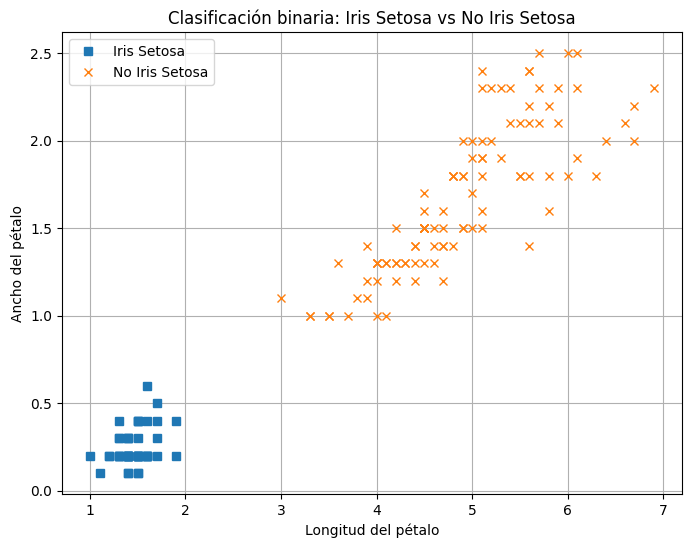

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(X[y == 1, 0], X[y == 1, 1], 's', label="Iris Setosa")
plt.plot(X[y == 0, 0], X[y == 0, 1], 'x', label="No Iris Setosa")
plt.grid(True)
plt.legend()
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title("Clasificación binaria: Iris Setosa vs No Iris Setosa")
plt.show()

**plt.figure(figsize=(8, 6))**
Damos el tamaño del grafico  8x6 , lo que mejora la visualizacion

 **plt.plot(X[y == 1, 0], X[y == 1, 1], 's', label="Iris Setosa")**

 grafica los datos donde y == 1, es decir, las instancias de Iris Setosa, utilizando marcadores en forma de cuadrado ('s')

 ** plt.plot(X[y == 0, 0], X[y == 0, 1], 'x', label="No Iris Setosa")**

 grafica las otras especies con marcadores en forma de cruz ('x')

**plt.grid(True)**

activa la cuadrícula para facilitar la interpretación del gráfico

**plt.legend()**
muestra la leyenda que diferencia las dos clases

**plt.xlabel('Longitud del pétalo') y plt.ylabel('Ancho del pétalo')**

 etiquetan los ejes X e Y con las características seleccionadas

**plt.title("Clasificación binaria: Iris Setosa vs No Iris Setosa")**

añade un título que describe la gráfica

**plt.show()**

muestra el gráfico

# Normalizar los datos

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

**scaler = StandardScaler()**

Crea una instancia de StandardScaler, una herramienta de scikit-learn que estandariza los datos. Esto significa que transforma las características para que tengan una media de 0 y una desviación estándar de 1

**Variantes:** En lugar de StandardScaler se puede llegar a usar:

- MinMaxScaler: Escala los datos a un rango definido, por defecto entre 0 y 1
- RobustScaler: Utiliza la mediana y el rango intercuartílico util si los datos tienen outliers

**X_norm = scaler.fit_transform(X)**

Aplica la estandarización a X

**fit_transform()**
primero ajusta (fit) el escalador calculando la media y la desviación estándar de las características, y luego transforma (transform) los datos usando esos valores

X_norm es la versión estandarizada de X, lo que facilita el entrenamiento de modelos que son sensibles a la escala de los datos


# Modelo del Perceptron

In [ ]:
model = Perceptron(max_iter=50, eta0=0.1, random_state=42, tol=None)
model.fit(X_norm, y)

Perceptron(eta0=0.1, max_iter=50, random_state=42, tol=None)

**model = Perceptron(max_iter=50, eta0=0.1, random_state=42, tol=None)**

Modelo de Perceptron un clasificador lineal que ajusta pesos para separar clases mediante una combinación lineal de caracteristicas

**Parametros:**

- max_iter=50: Numero maximo de iteraciones (epocas) sobre los datos en este caso el modelo realizará hasta 50 pasadas por el conjunto de datos para ajustar los pesos

Nota: Puedes aumentar este número si el modelo no converge o reducirlo para acelerar el entrenamiento

- eta0=0.1: Tasa de aprendizaje inicial. Controla el tamaño de los pasos que da el modelo para ajustar los pesos

Nota: Valores mas pequeños hacen el aprendizaje mas lento pero pueden mejorar la precision o valores mas grandes aceleran el aprendizaje pero pueden causar inestabilidad

- random_state=42: Semilla para generar resultados reproducibles. Garantiza que el modelo se inicialice de la misma manera cada vez que se ejecuta el codigo

Nota: Cambiar el valor dara diferentes resultados debido a la aleatoriedad en la inicialización de pesos

- tol=None: Tolerancia para la parada anticipada. Al establecerlo en None, el modelo no se detiene antes de completar todas las iteraciones, incluso si ya ha convergido

Nota: si le das un valor como tol=1e-3, el modelo se detendra si la mejora entre iteraciones es menor a ese umbral

**model.fit(X_norm, y)**

Entrena el modelo de perceptron usando los datos estandarizados X_norm y las etiquetas binarias y

Ajusta los pesos internos del modelo para encontrar una línea que separe las clases (Iris Setosa y No Iris Setosa)

# Parametros finales del modelo

In [ ]:
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

Coeficientes del modelo: [[-0.13311325 -0.11855672]]
Intercepto del modelo: [-0.1]


**print("Coeficientes del modelo:", model.coef_)**

Muestra los coeficientes del modelo, que representan los pesos asignados a cada característica tras el entrenamiento

Estos coeficientes indican la influencia de cada característica (longitud y ancho del pétalo) en la prediccion. Un valor positivo o negativo muestra si la característica contribuye a clasificar como Iris Setosa o No Iris Setosa

Nota:
Si el modelo tiene más de una clase (en problemas multiclase), model.coef_ devuelve un arreglo 2D donde cada fila corresponde a una clase

**print("Intercepto del modelo:", model.intercept_)**

Muestra el intercepto del modelo, que es el término independiente en la ecuación de la recta de decision

 El intercepto ajusta la posición de la línea de separación en el espacio de características. Sin este interceot la línea siempre pasaría por el origen (0,0) lo que no siempre es adecuado para separar las clases correctamente

Nota:
En problemas multiclase, model.intercept_ tendrá un valor para cada clase.
```



# Graficar

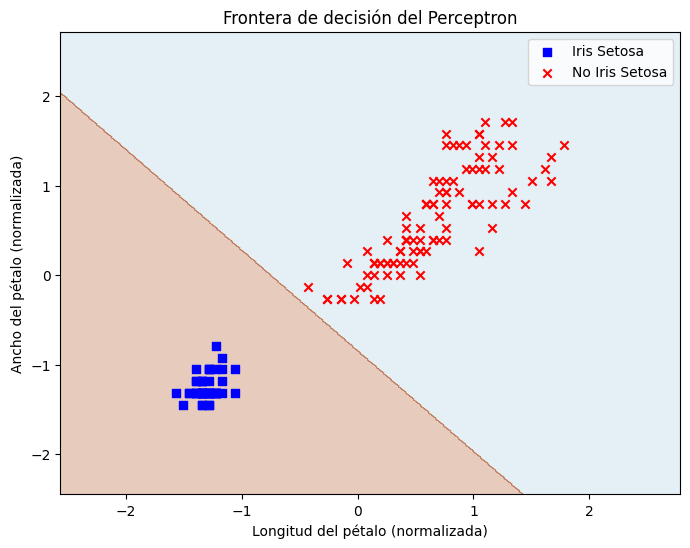

In [ ]:
# Se crea una malla en el espacio de las características normalizadas para visualizar la frontera de decision
x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Se predice la clase en cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Se grafican los datos de entrenamiento
plt.scatter(X_norm[y == 1, 0], X_norm[y == 1, 1], marker='s', color='blue', label="Iris Setosa")
plt.scatter(X_norm[y == 0, 0], X_norm[y == 0, 1], marker='x', color='red', label="No Iris Setosa")
plt.xlabel('Longitud del pétalo (normalizada)')
plt.ylabel('Ancho del pétalo (normalizada)')
plt.title("Frontera de decisión del Perceptron")
plt.legend()
plt.show()

**x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1**

Calcula el rango minimo y maximo de la primera caracteristica (longitud del pétalo normalizada) añadiendo un margen de 1 unidad a ambos extremos para asegurar que la gráfica no quede recortada

**y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1**
Hace lo mismo para la segunda caracteristica (ancho del pétalo normalizado),creando un margen que permite visualizar claramente los datos y la frontera de decision


**xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))**

Crea una malla de puntos en el espacio de las caracteristicas

- np.linspace(x_min, x_max, 500) genera 500 puntos equidistantes entre x_min y x_max

- np.meshgrid toma estos puntos y crea una cuadricula que cubre todo el espacio de caracteristicas

Esta malla permite evaluar el modelo en cada punto del espacio para visualizar cómo separa las clases

**Z = model.predict(np.c_[xx.ravel(), yy.ravel()])**

Predice la clase para cada punto en la malla

- xx.ravel() y yy.ravel() aplastan las matrices en vectores de una dimensión

- np.c_[] concatena estos vectores para crear un arreglo de coordenadas (pares de puntos) que se pasan al modelo para hacer predicciones

Determina a qué clase pertenece cada punto de la malla, lo que ayudará a dibujar la frontera de decision

**Z = Z.reshape(xx.shape)**

Convierte el vector de predicciones de nuevo a la forma original de la malla (xx.shape) para poder graficar correctamente la frontera de decision

**plt.figure(figsize=(8, 6))**
Crea el grafico de de 8x6

**plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)**

Dibuja la frontera de decisión usando los resultados de Z

- contourf crea un gráfico de contorno relleno donde cada región de color representa una clase

- alpha=0.3 ajusta la transparencia de las regiones para que los puntos de datos sean visibles

- cmap=plt.cm.Paired utiliza una paleta de colores que diferencia visualmente las clases

**plt.scatter(X_norm[y == 1, 0], X_norm[y == 1, 1], marker='s', color='blue', label="Iris Setosa")**

Grafica los puntos de Iris Setosa usando marcadores cuadrados ('s') en color azul

**plt.scatter(X_norm[y == 0, 0], X_norm[y == 0, 1], marker='x', color='red', label="No Iris Setosa")**

Grafica los puntos de las otras especies (Versicolor y Virginica)

usando marcadores en forma de cruz ('x') en color rojo


**plt.xlabel('Longitud del pétalo (normalizada)')**
Etiqueta el eje X indicando que los valores están normalizados.

**plt.ylabel('Ancho del pétalo (normalizada)')**

Etiqueta el eje Y también indicando la normalizacion


**plt.title("Frontera de decisión del Perceptron")**

Añade un titulo que describe que se está visualizando la frontera de decisión generada por el modelo Perceptron


**plt.legend()**

Muestra la leyenda que identifica las clases representadas en el grafico

**plt.show()**

Muestra el grafico

# Evaluacion del modelo

In [ ]:
y_pred = model.predict(X_norm)

**y_pred = model.predict(X_norm)**

Utiliza el modelo entrenado para hacer predicciones sobre los datos normalizados X_norm


**model.predict()**

toma las características de entrada y devuelve un arreglo con las predicciones. En este caso, como el problema es binario (Iris Setosa vs No Iris Setosa), el resultado será un arreglo de 0 y 1

 Permite comparar las predicciones con las etiquetas reales (y) para evaluar el rendimiento del modelo

# Matriz de confusión

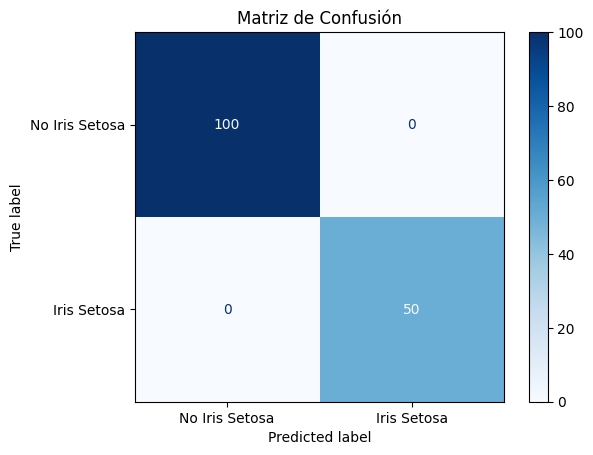

In [ ]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Iris Setosa', 'Iris Setosa'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

**cm = confusion_matrix(y, y_pred)**

Calcula la matriz de confusion comparando las etiquetas reales y con las predicciones y_pred

La matriz de confusión muestra el número de predicciones correctas e incorrectas para cada clase:

- Verdaderos Positivos (VP): Predicciones correctas de Iris Setosa

- Verdaderos Negativos (VN): Predicciones correctas de No Iris Setosa

- Falsos Positivos (FP): Predicciones incorrectas donde se clasificó como Iris Setosa siendo otra especie

- Falsos Negativos (FN): Predicciones incorrectas donde se clasificó como No Iris Setosa siendo Setosa

**disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Iris Setosa', 'Iris Setosa'])**

Crea un objeto ConfusionMatrixDisplay para visualizar la matriz de confusión


confusion_matrix=cm indica la matriz que se va a visualizar

- display_labels=['No Iris Setosa', 'Iris Setosa'] define las etiquetas que aparecerán en el gráfico para cada clase

- disp.plot(cmap=plt.cm.Blues)
Dibuja la matriz de confusión usando una escala de colores azules (cmap=plt.cm.Blues)

Los cuadros de la matriz se colorean en diferentes tonos de azul según la cantidad de predicciones en cada celda, lo que facilita identificar rápidamente dónde el modelo acierta o falla

**plt.title("Matriz de Confusión")**

Añade un titulo al grafico para indicar que se esta mostrando la matriz de confusion

**plt.show()**
Mostrar grafico

# Metricas de rendimiento

In [ ]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


**accuracy = accuracy_score(y, y_pred)**

Calcula la exactitud del modelo, que es la proporción de predicciones correctas sobre el total de predicciones

**precision = precision_score(y, y_pred)**

Calcula la precisión, que mide la proporción de predicciones positivas correctas entre todas las predicciones positivas

**recall = recall_score(y, y_pred)**

Calcula el recall o sensibilidad, que mide la proporción de verdaderos positivos correctamente identificados entre todos los casos positivos reales

**f1 = f1_score(y, y_pred)**

Calcula el F1 Score, que es la media armónica entre la precisión y el recall

**print(f'Accuracy: {accuracy:.2f}')**

Muestra la exactitud con dos decimales

**print(f'Precision: {precision:.2f}')**

Muestra la precisión con dos decimales

**print(f'Recall: {recall:.2f}')**

Muestra el recall con dos decimales

**print(f'F1 Score: {f1:.2f}')**

Muestra el F1 Score con dos decimales

# Informe completo de clasificacion

In [ ]:
print("\nInforme de Clasificación:")
print(classification_report(y, y_pred, target_names=['No Iris Setosa', 'Iris Setosa']))


Informe de Clasificación:
                precision    recall  f1-score   support

No Iris Setosa       1.00      1.00      1.00       100
   Iris Setosa       1.00      1.00      1.00        50

      accuracy                           1.00       150
     macro avg       1.00      1.00      1.00       150
  weighted avg       1.00      1.00      1.00       150



**print("\nInforme de Clasificación:")**

Imprime un encabezado para el informe de clasificacion. El agrega una línea en blanco antes del texto para mayor claridad en la salida

**print(classification_report(y, y_pred, target_names=['No Iris Setosa', 'Iris Setosa']))**

Muestra un informe detallado de métricas de clasificación generado por classification_report

Resume las principales métricas de evaluación para cada clase:

- Precision: Proporción de predicciones positivas correctas

- Recall: Proporción de verdaderos positivos correctamente identificados

- F1-score: Media armónica entre precisión y recall

- Support: Número de muestras reales de cada clase

Parámetros:

- y: Etiquetas verdaderas del conjunto de datos

- y_pred: Predicciones realizadas por el modelo

- target_names=['No Iris Setosa', 'Iris Setosa']: Etiquetas personalizadas para las clases en lugar de usar 0 y 1


Proporciona una visión completa del rendimiento del modelo por clase, lo cual es útil para identificar si el modelo está funcionando mejor en una clase que en otra

# Exportar el modelo para produccion

In [ ]:
model_filename = 'perceptron_model.pkl'
joblib.dump({'model': model, 'scaler': scaler}, model_filename)
print(f"Modelo exportado a {model_filename}")

Modelo exportado a perceptron_model.pkl


**model_filename = 'perceptron_model.pkl'**

Define el nombre del archivo donde se guardará el modelo entrenado

.pkl es la extensión común para archivos serializados en Python usando el formato pickle, que permite almacenar objetos de Python para su uso posterior

**joblib.dump({'model': model, 'scaler': scaler}, model_filename)**

Guarda el modelo y el escalador en un archivo utilizando joblib

**Que hace?:**
Serializa un diccionario que contiene el modelo (model) y el escalador (scaler) en el archivo 'perceptron_model.pkl'

**Para que sirve?:**
Permite reutilizar el modelo y el escalador más adelante sin necesidad de volver a entrenar ni normalizar desde cero

**print(f"Modelo exportado a {model_filename}")**

Imprime un mensaje confirmando que el modelo ha sido exportado exitosamente al archivo especificado (perceptron_model.pkl)

# Codigo para cargar el modelo y utilizarlo en produccion

In [ ]:
def load_model(model_path):
    data = joblib.load(model_path)
    return data

**def load_model(model_path):**

Definimos una función llamada load_model que toma un parámetro model_path

**Que hace?:**
Esta función está diseñada para cargar un modelo previamente guardado desde el archivo especificado en model_path

**Parámetros:**

- model_path: Ruta del archivo donde se encuentra el modelo serializado. Puede ser un archivo .pkl o cualquier otro formato compatible con joblib

**Para que sirve?:**

Simplifica el proceso de recuperación del modelo guardado facilitando su reutilización sin necesidad de reescribir el código para cargarlo

**data = joblib.load(model_path)**

Utiliza joblib.load() para deserializar el archivo y cargar el contenido en la variable data

**Que hace?:**

Recupera el diccionario que contiene el modelo (model) y el escalador (scaler) desde el archivo guardado

Nota:
Si solo guardaste un objeto (como el modelo), data contendrá directamente el modelo en lugar de un diccionario

**return data**
Devuelve el contenido cargado que en este caso es un diccionario con el modelo y el escalador

# Ejemplo de uso en produccion

Supongamos que en producción se reciben nuevos datos (con las características originales) y se desea predecir la clase

# Cargar el modelo exportado

In [ ]:
loaded_data = load_model(model_filename)
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

**loaded_data = load_model(model_filename)**

Llama a la función load_model pasando como argumento model_filename (que contiene 'perceptron_model.pkl')

**Que hace?:**

Carga el archivo que contiene el modelo y el escalador previamente guardados y los almacena en la variable loaded_data

**Para que sirve?:**

Recupera el modelo y el escalador para poder utilizarlos sin necesidad de reentrenar o reescalar los datos

**loaded_model = loaded_data['model']**

Extrae el modelo Perceptrón del diccionario loaded_data y lo asigna a la variable loaded_model

**Para que sirve?:**

Permite utilizar el modelo cargado para hacer predicciones, como si fuera el modelo original entrenado

**loaded_scaler = loaded_data['scaler']**

Extrae el escalador (StandardScaler) del diccionario loaded_data y lo asigna a la variable loaded_scaler

**Para que sirve?:**
Permite transformar nuevos datos de la misma manera que se transformaron los datos originales antes de hacer predicciones con el modelo cargado

# Nuevos datos a clasificar (sin normalizar)

In [ ]:
X_new = np.array([
    [4.5, 1.5],  # Ejemplo que podría pertenecer a Iris Setosa
    [3.0, 0.8]   # Ejemplo que probablemente no es Iris Setosa
])

**X_new = np.array([[4.5, 1.5], [3.0, 0.8]])**

Crea un arreglo NumPy con dos nuevos ejemplos para realizar predicciones

**Primer ejemplo [4.5, 1.5]:**

Representa un caso que podría pertenecer a Iris Setosa, ya que tiene un pétalo relativamente corto y ancho moderado

**Segundo ejemplo [3.0, 0.8]:**

Representa un caso que probablemente no es Iris Setosa, debido al menor ancho y longitud del pétalo que podrían acercarse más a las otras especies (Versicolor o Virginica)

Cada fila del arreglo corresponde a una flor, y las columnas representan:

- Columna 0: Longitud del pétalo
- Columna 1: Ancho del pétalo

# Normalizamos los nuevos datos utilizando el mismo scaler

In [ ]:
X_new_norm = loaded_scaler.transform(X_new)

**X_new_norm = loaded_scaler.transform(X_new)**

Aplica la normalización a los nuevos datos X_new usando el escalador loaded_scaler que fue guardado y cargado previamente


**Que hace?:**

Transforma las características (longitud y ancho del pétalo) para que tengan la misma escala que los datos de entrenamiento. Esto asegura que el modelo interprete los nuevos datos correctamente

**Para que sirve?:**

El modelo Perceptrón fue entrenado con datos normalizados. Si intentas predecir sin normalizar, los resultados podrían ser incorrectos porque el modelo espera que los datos tengan una media de 0 y una desviación estándar de 1


# Se hace la prediccion

In [ ]:
  y_new_pred = loaded_model.predict(X_new_norm)
  print("Predicciones para nuevos datos:", y_new_pred)

Predicciones para nuevos datos: [0 1]


**y_new_pred = loaded_model.predict(X_new_norm)**

Utiliza el modelo Perceptrón cargado (loaded_model) para predecir las clases de los nuevos datos normalizados (X_new_norm)

**Que hace?:**

Genera un arreglo con las predicciones para cada uno de los nuevos ejemplos:


- 1 indica que el modelo clasifica el ejemplo como Iris Setosa
- 0 indica que el modelo clasifica el ejemplo como No Iris Setosa

**print("Predicciones para nuevos datos:", y_new_pred)**

Muestra las predicciones generadas por el modelo en la consola

En este caso:
- El primer ejemplo [4.5, 1.5] fue clasificado como Iris Setosa (1)
- El segundo ejemplo [3.0, 0.8] fue clasificado como No Iris Setosa (0)